# ***Preparación***


In [41]:
!pip install numpyro[jax] jax jaxlib arviz scikit-learn matplotlib

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib


In [43]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
# Mostrar las primeras filas para entender su estructura
print("Muestra del dataset original:")
print(df.head())

Muestra del dataset original:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


# ***Limpieza y preprocesamiento de datos***




*Serial No.* Es un identificador y no aporta información relevante para el modelo

In [44]:
# Excluir la columna "Serial No."
print("\nExcluyendo columna 'Serial No.'...")
df = df.drop('Serial No.', axis=1)

# Verificar que la columna fue eliminada mostrando las columnas resultantes
print("\nColumnas después de excluir 'Serial No.':")
print(df.columns.tolist())

# Mostrar las primeras filas del dataset después de eliminar la columna
print("\nPrimeras filas del dataset sin la columna 'Serial No.':")
print(df.head())


Excluyendo columna 'Serial No.'...

Columnas después de excluir 'Serial No.':
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Primeras filas del dataset sin la columna 'Serial No.':
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  


Verificación de los tipos de datos


In [45]:
# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos:
df.dropna(inplace=True)



Tipos de datos:
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Cantidad de valores nulos por columna:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [46]:
# Resumen estadístico básico para detectar valores extremos o inusuales
print("Resumen estadístico:")
print(df.describe().T)
print("\n")

Resumen estadístico:
                   count       mean        std     min       25%     50%  \
GRE Score          500.0  316.47200  11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200   6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400   1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400   0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400   0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644   0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000   0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174   0.141140    0.34    0.6300    0.72   

                      75%     max  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR                  4.00    5.00  
CGPA                 9.04    9.92  
Research             1.00    1.00  
Chance

In [47]:
duplicate_rows = df.duplicated().sum()
print(f"Filas duplicadas: {duplicate_rows}")
print("\n")

Filas duplicadas: 0




In [48]:
# Verificar valores en variables categóricas o discretas
if 'Research' in df.columns:
    print("Valores únicos en columna Research:")
    print(df['Research'].value_counts())
    print("\n")

Valores únicos en columna Research:
Research
1    280
0    220
Name: count, dtype: int64




# ***Análisis Exploratorio de los Datos***

In [49]:
# Estadísticos descriptivos
print("\nEstadísticos descriptivos:")
print(df.describe())

# Configuración para visualizaciones
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")


Estadísticos descriptivos:
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000        

<Figure size 1500x1000 with 0 Axes>

In [50]:
custom_palette = {
    'green': '#4CAF50',     # Verde
    'light_green': '#8BC34A', # Verde claro
    'teal': '#009688',      # Verde azulado/Celeste
    'light_blue': '#03A9F4', # Celeste claro
    'gray': '#9E9E9E',      # Gris
    'dark_gray': '#616161', # Gris oscuro
    'pink': '#F8BBD0',      # Rosa tierno
    'light_pink': '#FCE4EC' # Rosa más claro
}

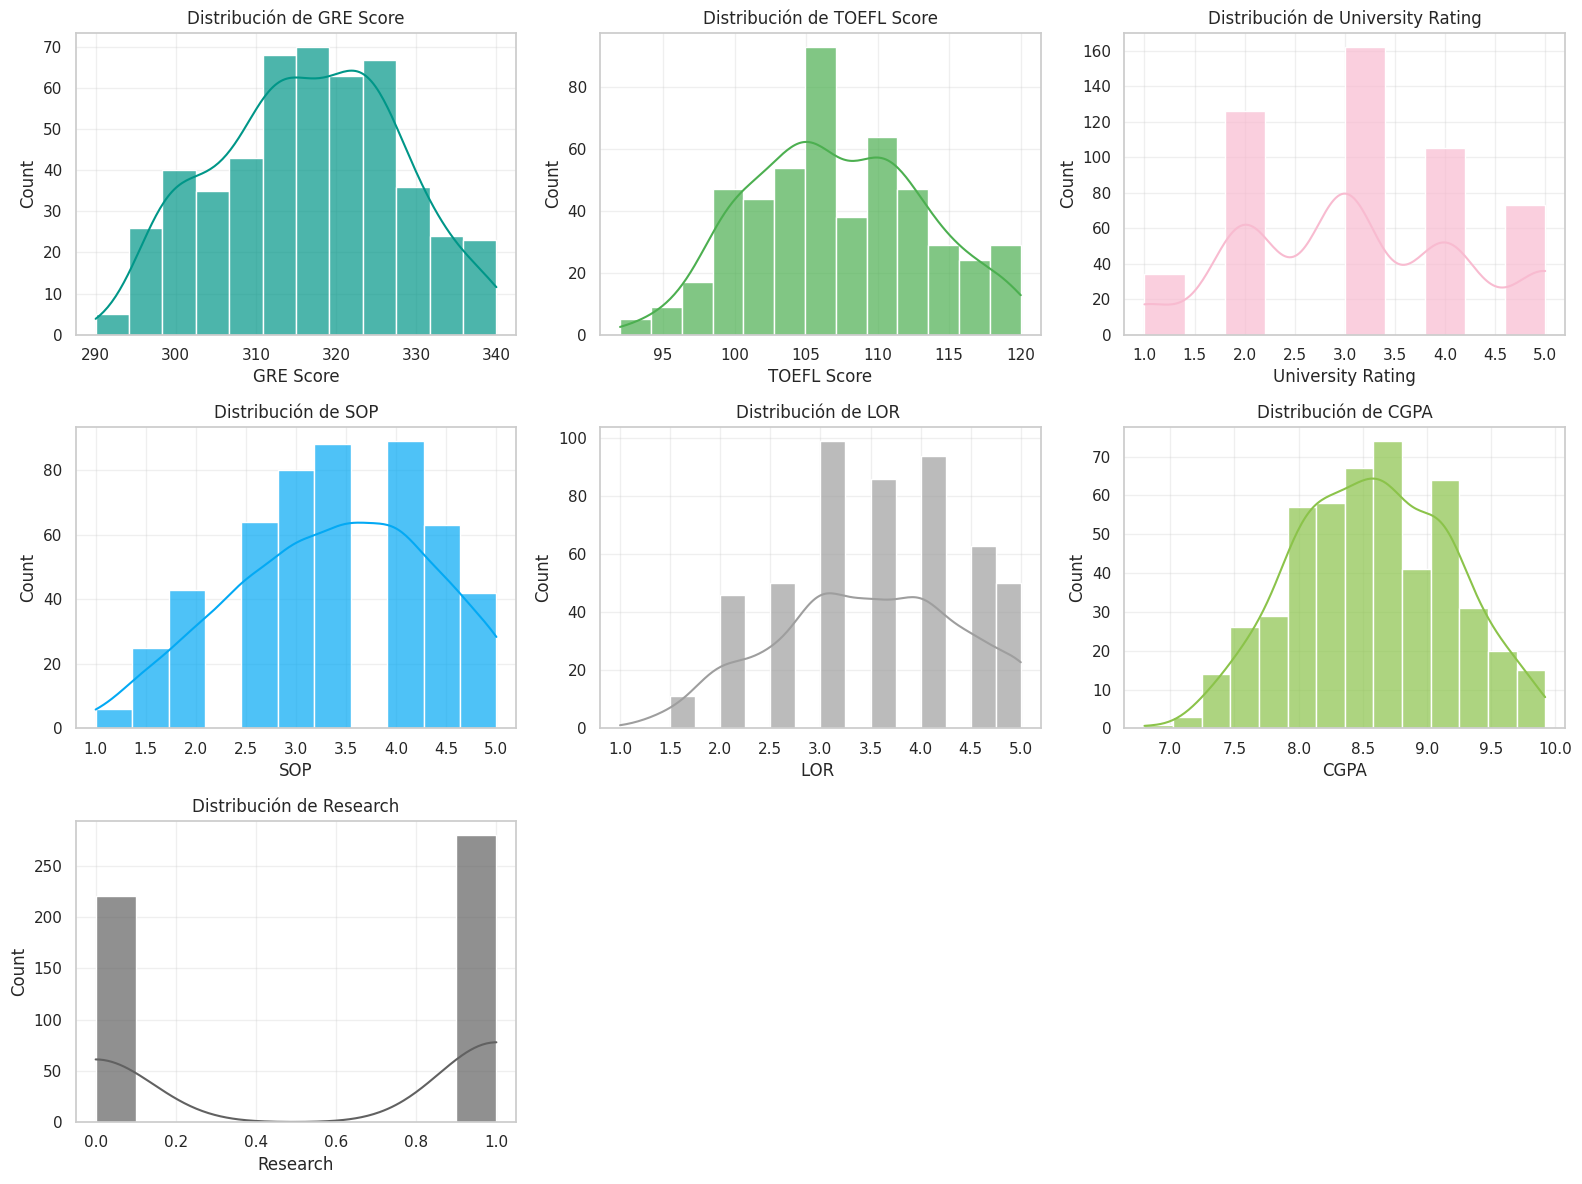

In [51]:
# 1. Histogramas para cada variable numérica
plt.figure(figsize=(16, 12))
colors = [custom_palette['teal'], custom_palette['green'], custom_palette['pink'],
         custom_palette['light_blue'], custom_palette['gray'], custom_palette['light_green'],
         custom_palette['dark_gray']]

for i, (column, color) in enumerate(zip(df.columns, colors)):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True, color=color, alpha=0.7)
    plt.title(f'Distribución de {column}', fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('histogramas_personalizados.png')
plt.show()


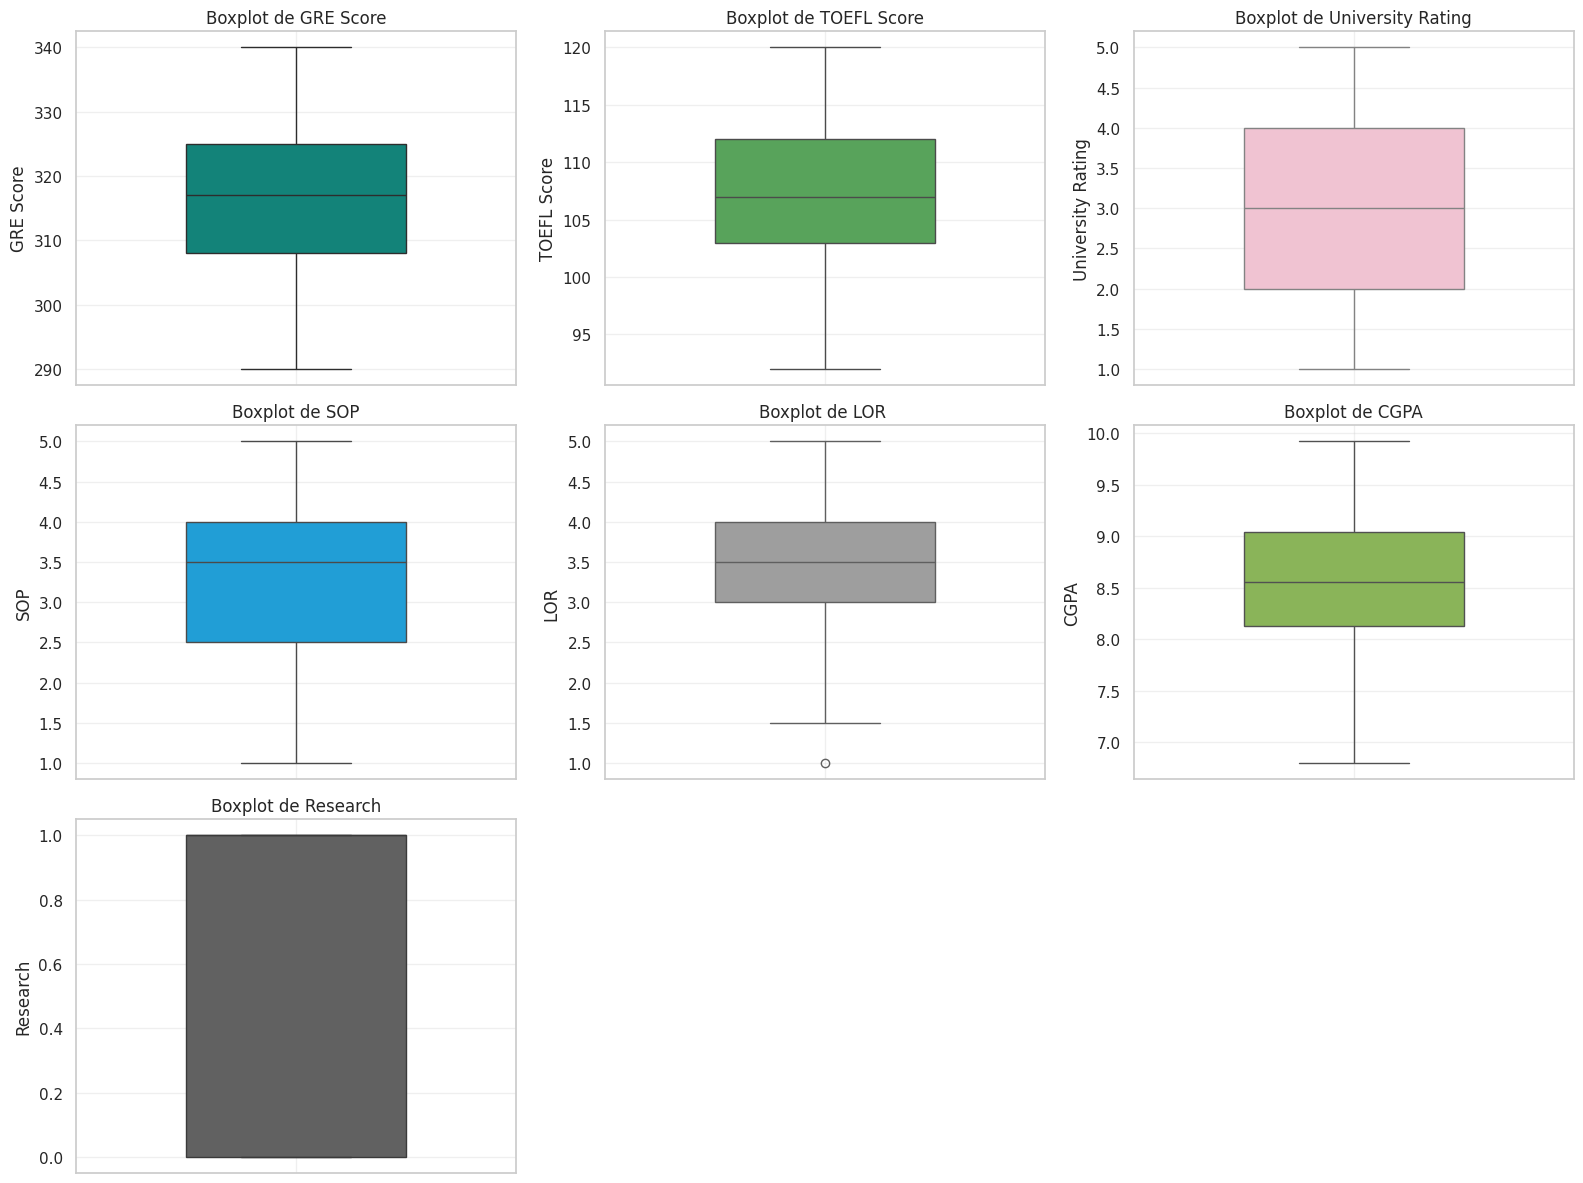

In [52]:
# 2. Boxplots
plt.figure(figsize=(16, 12))
for i, (column, color) in enumerate(zip(df.columns, colors)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column], color=color, width=0.5)
    plt.title(f'Boxplot de {column}', fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('boxplots_personalizados.png')
plt.show()

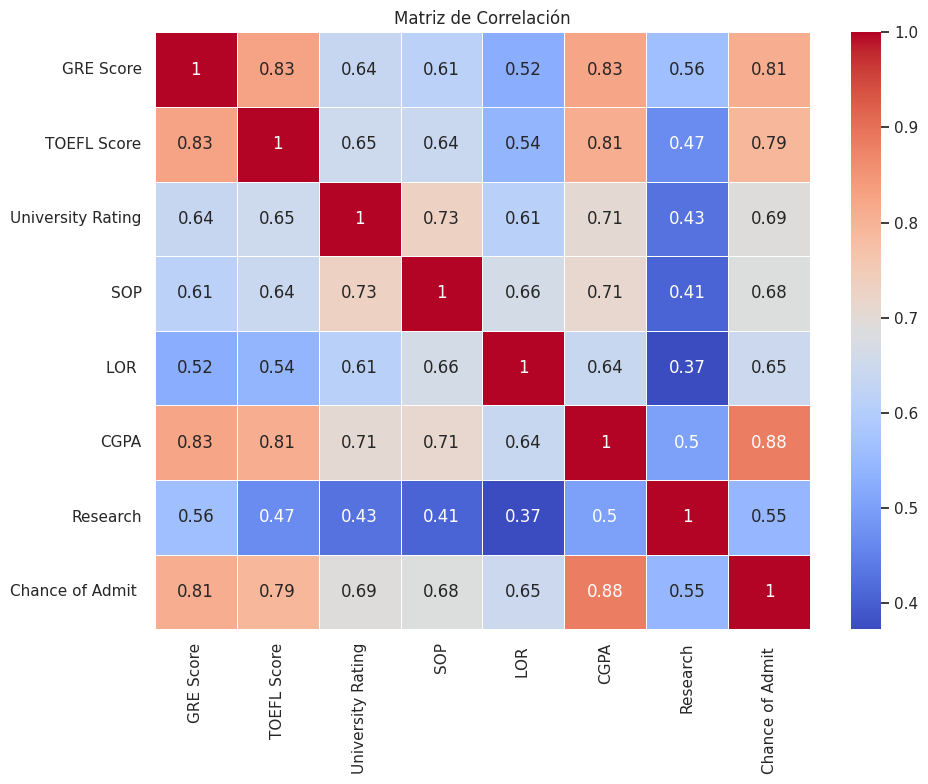

In [53]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

* Este gráfico muestra la relación entre las variables numéricas del dataset.

* Valores cercanos a 1 indican correlaciones fuertes y positivas, mientras que valores negativos cercanos a -1 indican relaciones inversas.

* Si una variable está altamente correlacionada con la probabilidad de admisión, puede ser una variable importante en el análisis.


<Figure size 1600x1200 with 0 Axes>

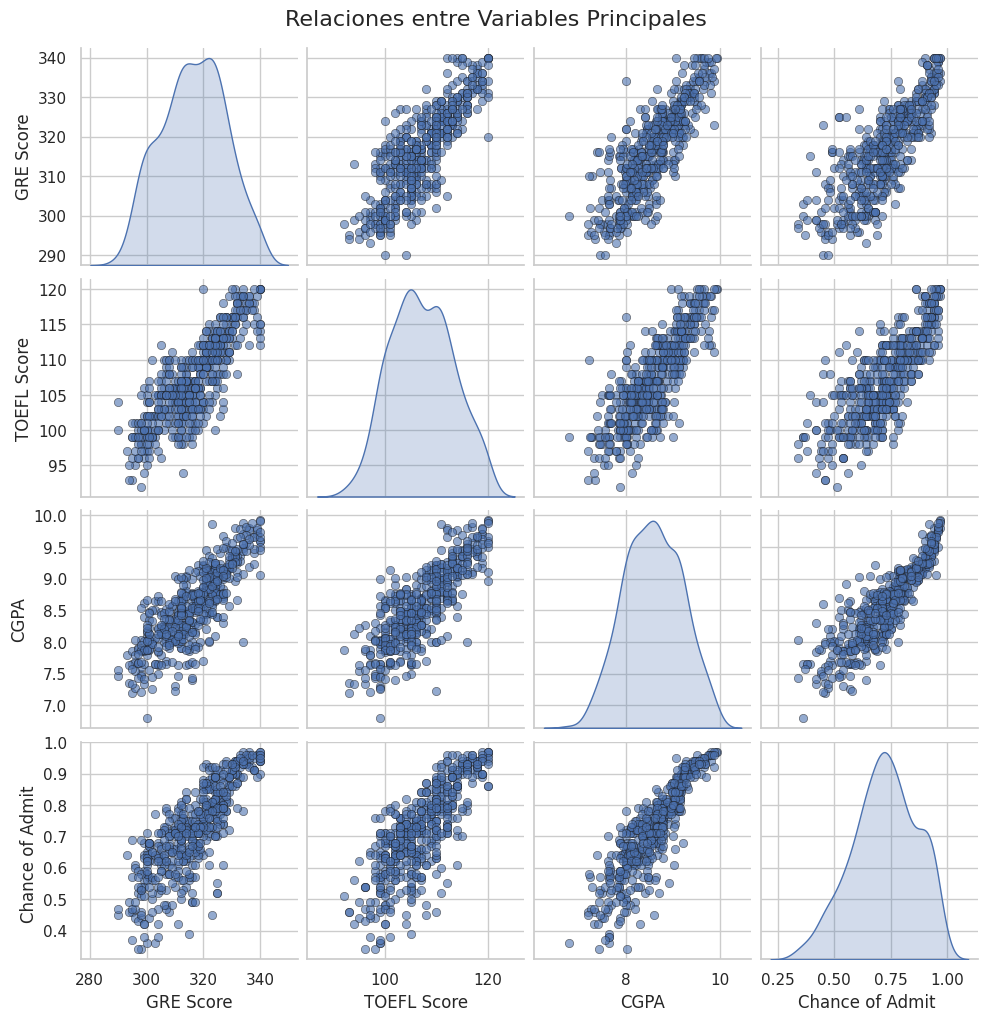

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# Verificar si las columnas existen en el DataFrame
missing_cols = [col for col in features if col not in df.columns]
if missing_cols:
    print(f"Columnas faltantes en el DataFrame: {missing_cols}")
else:
    plt.figure(figsize=(16, 12))
    sns.pairplot(df[features],
                 kind='scatter',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
                 diag_kws={'fill': True})

    plt.suptitle('Relaciones entre Variables Principales', y=1.02, fontsize=16)
    plt.savefig('pairplot_personalizado.png')
    plt.show()


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Seleccionar las variables
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']
required_cols = features + ['University Rating']

# Verificar que las columnas necesarias existan en el DataFrame
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"Columnas faltantes en el DataFrame: {missing_cols}")
else:
    # Obtener los ratings únicos y ordenarlos
    unique_ratings = sorted(df['University Rating'].unique())

    # Crear el widget de selección múltiple
    rating_selector = widgets.SelectMultiple(
        options=unique_ratings,
        value=tuple(unique_ratings),  # Valor por defecto: todos seleccionados
        description='Ratings:',
        disabled=False
    )

    def update_plot(selected_ratings):
        clear_output(wait=True)  # Limpia la salida para actualizar el gráfico
        df_filtered = df[df['University Rating'].isin(list(selected_ratings))]
        if df_filtered.empty:
            print("No hay datos para los ratings seleccionados.")
        else:
            pairplot = sns.pairplot(df_filtered[required_cols],
                                    hue='University Rating',
                                    kind='scatter',
                                    diag_kind='kde',
                                    palette='Set1',  # Colores llamativos
                                    plot_kws={'alpha': 0.7, 'edgecolor': 'black', 'linewidth': 0.6},
                                    diag_kws={'fill': True})
            pairplot.fig.suptitle('Relaciones entre Variables Principales según University Rating', y=1.02, fontsize=16)
            plt.show()

    # Mostrar el widget interactivo
    widgets.interact(update_plot, selected_ratings=rating_selector)


interactive(children=(SelectMultiple(description='Ratings:', index=(0, 1, 2, 3, 4), options=(np.int64(1), np.i…

<Figure size 1600x1200 with 0 Axes>

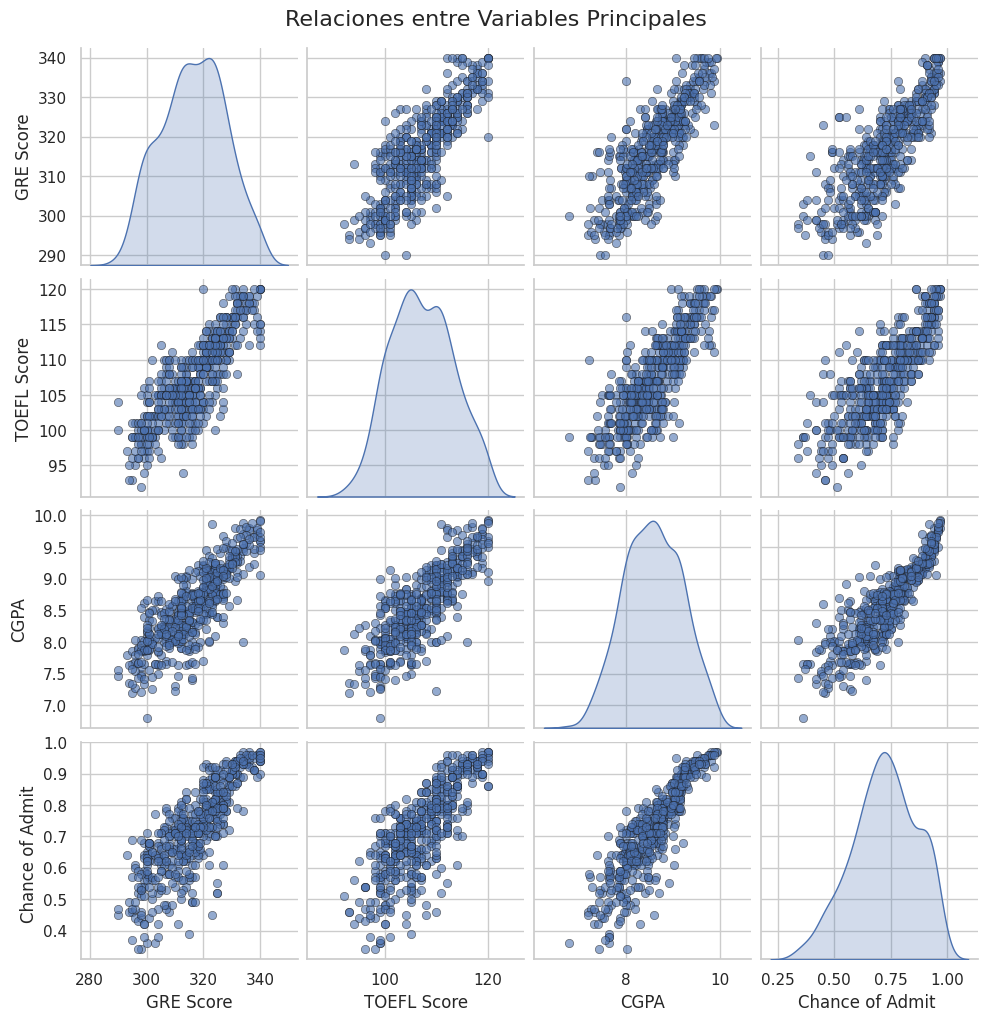

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# Verificar si las columnas existen en el DataFrame
missing_cols = [col for col in features if col not in df.columns]
if missing_cols:
    print(f"Columnas faltantes en el DataFrame: {missing_cols}")
else:
    plt.figure(figsize=(16, 12))
    sns.pairplot(df[features],
                 kind='scatter',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
                 diag_kws={'fill': True})

    plt.suptitle('Relaciones entre Variables Principales', y=1.02, fontsize=16)
    plt.savefig('pairplot_personalizado.png')
    plt.show()


1. Existe una correlación positiva fuerte entre todas las variables (cuando una aumenta, las otras también tienden a aumentar)
2. La relación más fuerte parece ser entre CGPA y Chance of Admit, donde se ve una tendencia claramente lineal ascendente
3. La probabilidad de admisión tiene una distribución bimodal (con dos picos), con concentraciones alrededor de 0.75 y 0.95
4. Estudiantes con puntajes más altos en las tres métricas académicas (GRE, TOEFL y CGPA) tienen consistentemente mayores probabilidades de admisión

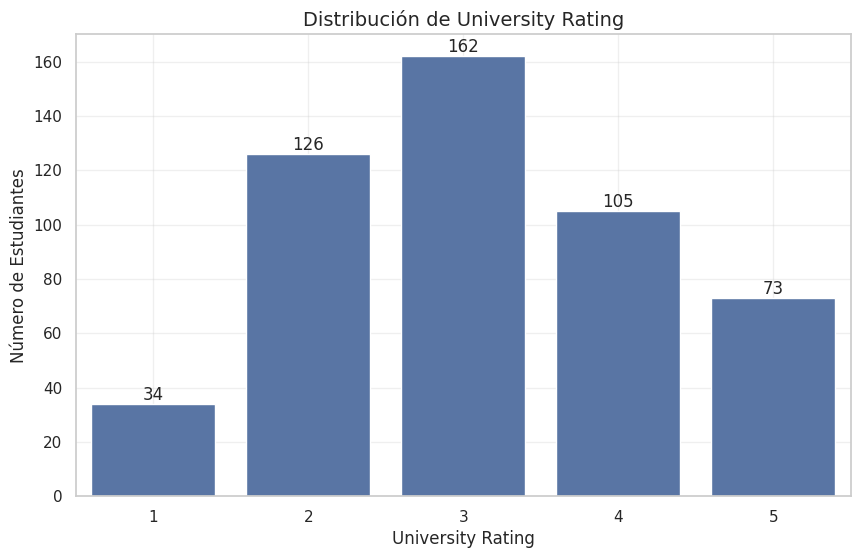

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='University Rating', data=df)

plt.title('Distribución de University Rating', fontsize=14)
plt.xlabel('University Rating')
plt.ylabel('Número de Estudiantes')

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Añadir grid
plt.grid(True, alpha=0.3)

plt.savefig('university_rating_dist.png')
plt.show()

El gráfico muestra que la mayoría de estudiantes en tu conjunto de datos provienen de universidades con rating 3 (133 estudiantes) y rating 2 (107 estudiantes), mientras que hay menos estudiantes de universidades con rating 1, 4 y 5.

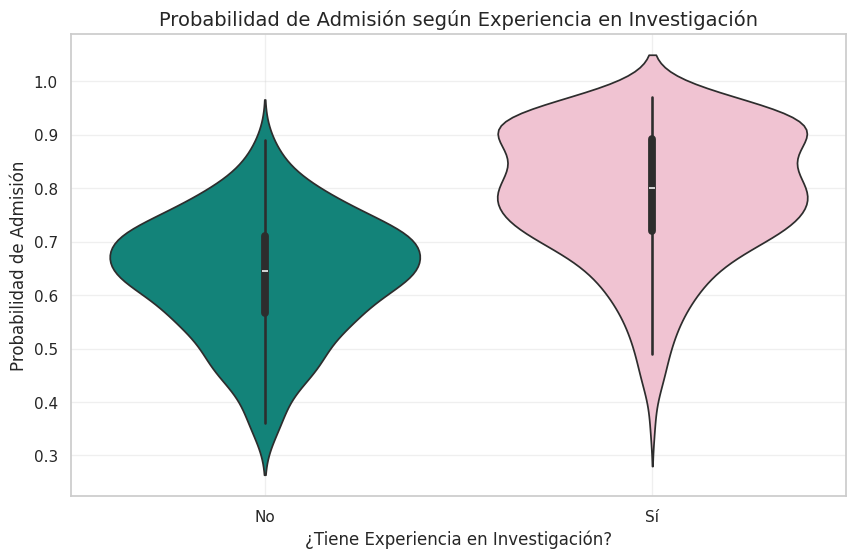

In [58]:
# 6. Gráfico de violín para 'Chance of Admit' por 'Research'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Research', y='Chance of Admit ', hue='Research', data=df,
              palette=[custom_palette['teal'], custom_palette['pink']], legend=False)
plt.title('Probabilidad de Admisión según Experiencia en Investigación', fontsize=14)
plt.xlabel('¿Tiene Experiencia en Investigación?')
plt.ylabel('Probabilidad de Admisión')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True, alpha=0.3)
plt.savefig('research_vs_admit.png')
plt.show()

Distribución para quienes tienen investigación:

Mediana aproximadamente en 0.8 (línea negra central)
Distribución concentrada entre 0.7 y 0.95
Forma bimodal con mayor concentración en la parte superior
Rango: aproximadamente de 0.3 a 1.0


Distribución para quienes no tienen investigación:

Mediana aproximadamente en 0.65
Distribución más amplia y uniforme entre 0.45 y 0.75
Pequeño pico adicional cerca de 0.9
Rango: aproximadamente de 0.25 a 0.95

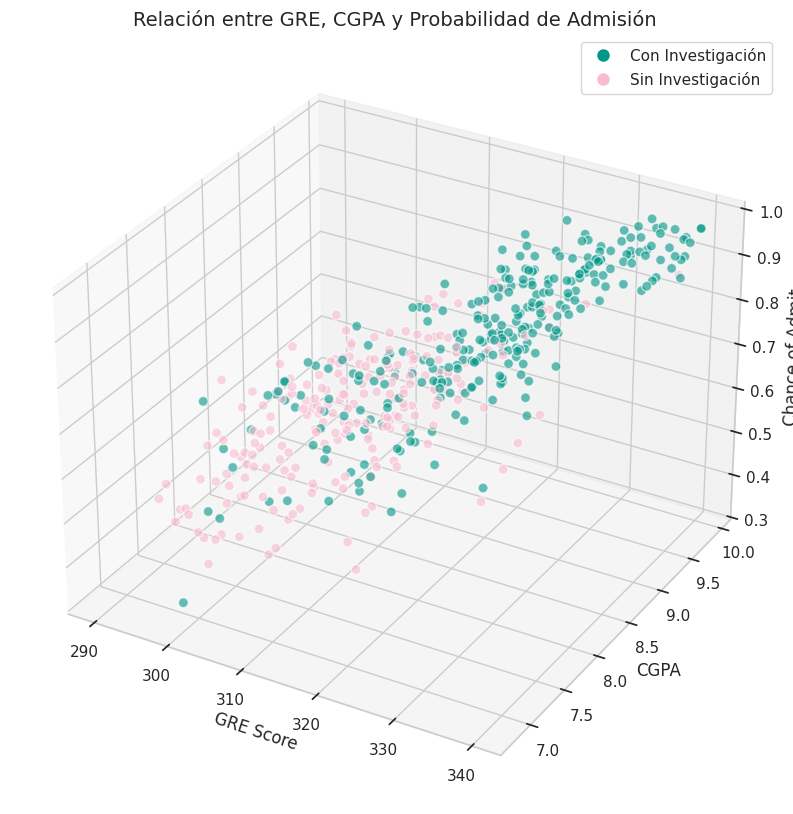

In [59]:

# 7. Gráfico de dispersión 3D para las variables más importantes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Seleccionamos variables según la correlación encontrada
x = df['GRE Score']
y = df['CGPA']
z = df['Chance of Admit ']

colors = [custom_palette['teal'] if r == 1 else custom_palette['pink'] for r in df['Research']]

ax.scatter(x, y, z, c=colors, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('GRE Score')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit')
plt.title('Relación entre GRE, CGPA y Probabilidad de Admisión', fontsize=14)

# Añadir leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Con Investigación',
          markerfacecolor=custom_palette['teal'], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Sin Investigación',
          markerfacecolor=custom_palette['pink'], markersize=10)
]
ax.legend(handles=legend_elements)

plt.savefig('scatter_3d_personalizado.png')
plt.show()

La visualización muestra claramente una tendencia positiva donde:

A mayor puntuación GRE y mayor CGPA, mayor es la probabilidad de admisión
Los candidatos con experiencia en investigación (puntos verdes) tienden a tener probabilidades de admisión más altas que aquellos sin experiencia en investigación (puntos rosa), incluso con puntuaciones GRE y CGPA similares

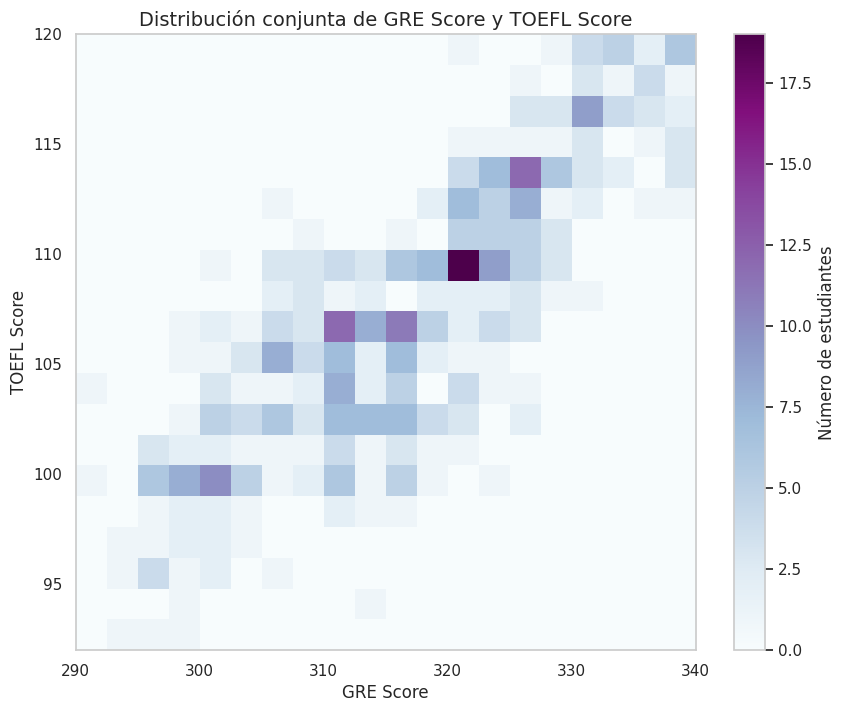

In [60]:
# 8. Histograma 2D para GRE vs TOEFL
plt.figure(figsize=(10, 8))
x = df['GRE Score']
y = df['TOEFL Score']
plt.hist2d(x, y, bins=20, cmap=plt.cm.BuPu)
plt.colorbar(label='Número de estudiantes')

plt.title('Distribución conjunta de GRE Score y TOEFL Score', fontsize=14)
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.grid(True, alpha=0.3)
plt.savefig('gre_toefl_hist2d.png')
plt.show()

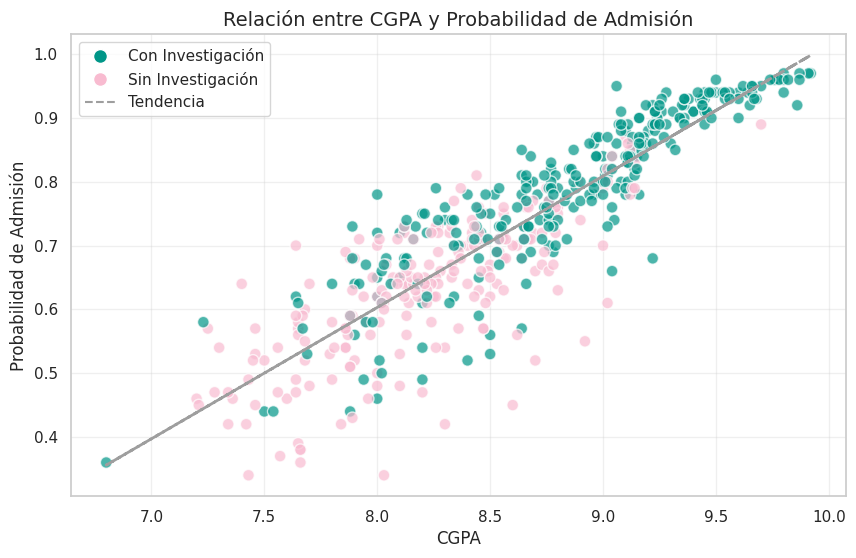

In [61]:
# 9. Gráfico de dispersión para CGPA vs Chance of Admit
plt.figure(figsize=(10, 6))
plt.scatter(df['CGPA'], df['Chance of Admit '],
            c=[custom_palette['teal'] if r == 1 else custom_palette['pink'] for r in df['Research']],
            alpha=0.7, s=70, edgecolors='w')

# Añadir línea de tendencia
x = df['CGPA']
y = df['Chance of Admit ']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color=custom_palette['gray'], linewidth=2)

plt.title('Relación entre CGPA y Probabilidad de Admisión', fontsize=14)
plt.xlabel('CGPA')
plt.ylabel('Probabilidad de Admisión')

# Añadir leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Con Investigación',
          markerfacecolor=custom_palette['teal'], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Sin Investigación',
          markerfacecolor=custom_palette['pink'], markersize=10),
    Line2D([0], [0], color=custom_palette['gray'], linestyle='--', label='Tendencia')
]
plt.legend(handles=legend_elements)

plt.grid(True, alpha=0.3)
plt.savefig('cgpa_vs_admit.png')
plt.show()

# ***Escalado de variables***

## StandardScale

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Definir las columnas a escalar
columns_to_scale = ['GRE Score', 'TOEFL Score']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Mostrar los datos escalados
print("\nMuestra de datos escalados:")
print(df_scaled.head())


Muestra de datos escalados:
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0   1.819238     1.778865                  4  4.5   4.5  9.65         1   
1   0.667148    -0.031601                  4  4.0   4.5  8.87         1   
2  -0.041830    -0.525364                  3  3.0   3.5  8.00         1   
3   0.489904     0.462163                  3  3.5   2.5  8.67         1   
4  -0.219074    -0.689952                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  


In [63]:
# Comparación de estadísticas antes y después del escalado
for col in columns_to_scale:
    original_stats = [df[col].mean(), df[col].median(), df[col].std(), df[col].min(), df[col].max()]
    scaled_stats = [df_scaled[col].mean(), df_scaled[col].median(), df_scaled[col].std(), df_scaled[col].min(), df_scaled[col].max()]

    col_comparison = pd.DataFrame({
        'Original': original_stats,
        'Escalado': scaled_stats
    }, index=['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'])

    print(f"\nEstadísticas para {col}:")
    print(col_comparison.round(3))


Estadísticas para GRE Score:
                Original  Escalado
Media            316.472     0.000
Mediana          317.000     0.047
Desv. Estándar    11.295     1.001
Mínimo           290.000    -2.346
Máximo           340.000     2.085

Estadísticas para TOEFL Score:
                Original  Escalado
Media            107.192     0.000
Mediana          107.000    -0.032
Desv. Estándar     6.082     1.001
Mínimo            92.000    -2.500
Máximo           120.000     2.108


In [64]:
from scipy import stats

# Prueba de normalidad antes y después del escalado
for col in columns_to_scale:
    original_shapiro = stats.shapiro(df[col])
    scaled_shapiro = stats.shapiro(df_scaled[col])

    print(f"Prueba de normalidad para {col}:")
    print(f"  - Original: p-value = {original_shapiro.pvalue:.4f}")
    print(f"  - Escalado (PowerTransformer): p-value = {scaled_shapiro.pvalue:.4f}")

Prueba de normalidad para GRE Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001
Prueba de normalidad para TOEFL Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001


La normalización Standard no logró normalizar los datos

## Power Transformer Yeo-Jhonson

In [65]:
from sklearn.preprocessing import PowerTransformer
# Aplicar PowerTransformer a todas las columnas numéricas para normalizar
scaler = PowerTransformer(method='yeo-johnson')
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# Comparación de estadísticas antes y después del escalado
for col in columns_to_scale:
    original_stats = [df[col].mean(), df[col].median(), df[col].std(), df[col].min(), df[col].max()]
    scaled_stats = [df_scaled[col].mean(), df_scaled[col].median(), df_scaled[col].std(), df_scaled[col].min(), df_scaled[col].max()]

    col_comparison = pd.DataFrame({
        'Original': original_stats,
        'Escalado': scaled_stats
    }, index=['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'])

    print(f"\nEstadísticas para {col}:")
    print(col_comparison.round(3))


Estadísticas para GRE Score:
                Original  Escalado
Media            316.472    -0.000
Mediana          317.000     0.040
Desv. Estándar    11.295     1.001
Mínimo           290.000    -2.314
Máximo           340.000     2.110

Estadísticas para TOEFL Score:
                Original  Escalado
Media            107.192     0.000
Mediana          107.000    -0.008
Desv. Estándar     6.082     1.001
Mínimo            92.000    -2.641
Máximo           120.000     2.032


La prueba de Shapiro-Wilk verifica si una muestra proviene de una distribución normal.
p-value bajo (<0.05) indica que es poco probable que los datos sean normales.
p-value alto (>=0.05) indica que los datos podrían seguir una distribución normal.


In [66]:
# Prueba de normalidad antes y después del escalado
for col in columns_to_scale:
    original_shapiro = stats.shapiro(df[col])
    scaled_shapiro = stats.shapiro(df_scaled[col])

    print(f"Prueba de normalidad para {col}:")
    print(f"  - Original: p-value = {original_shapiro.pvalue:.4f}")
    print(f"  - Escalado (PowerTransformer): p-value = {scaled_shapiro.pvalue:.4f}")

Prueba de normalidad para GRE Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001
Prueba de normalidad para TOEFL Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0002


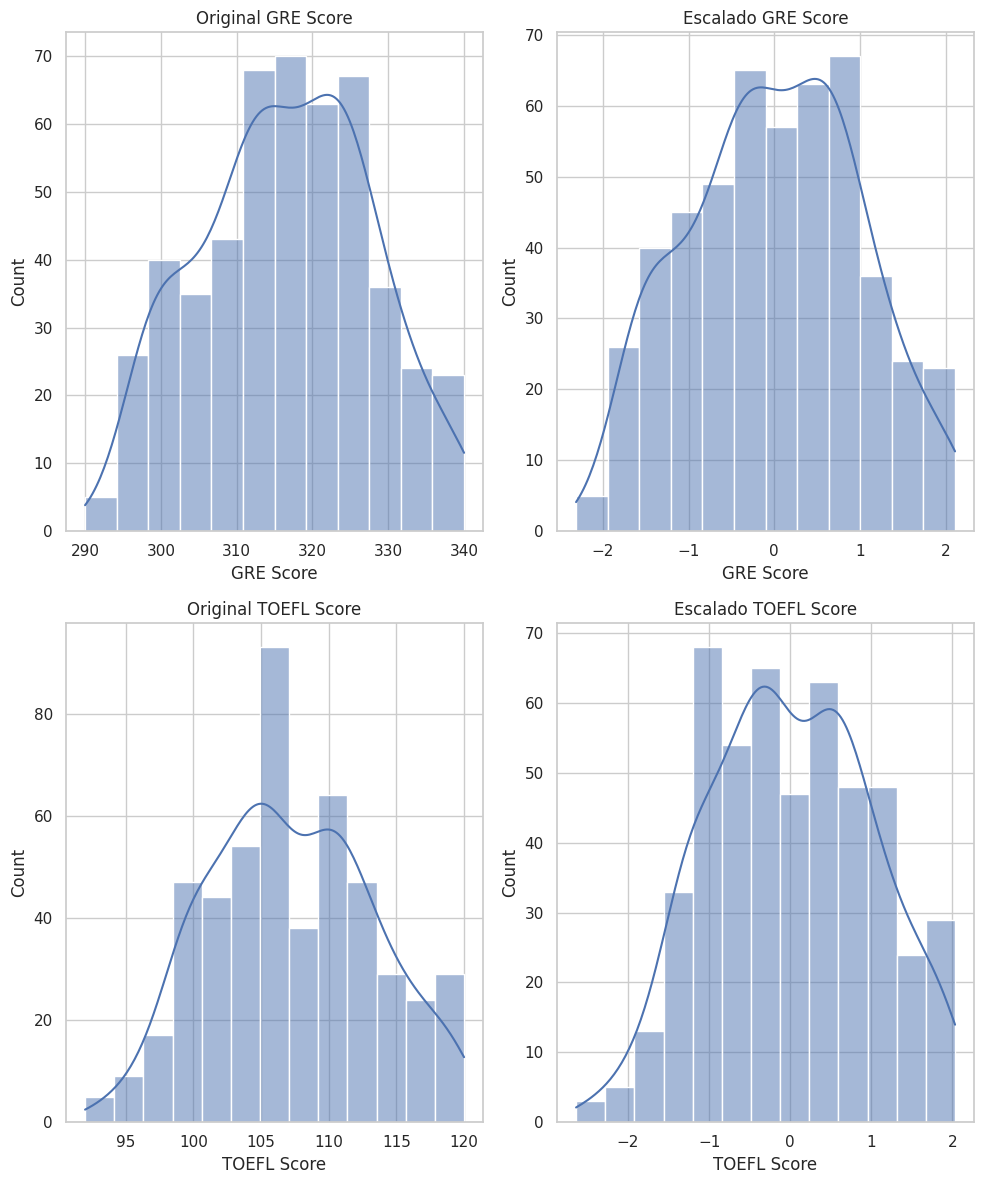

In [67]:
# Graficar distribuciones antes y después del escalado
fig, axes = plt.subplots(len(columns_to_scale), 2, figsize=(10, 12))

# Calculate number of rows and columns for the subplots
num_rows = len(columns_to_scale)
num_cols = 2

for i, col in enumerate(columns_to_scale):
    # Calculate the subplot index based on the current row and column
    subplot_index = i * num_cols + 1

    # Plot the original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original {col}")

    # Plot the scaled distribution
    sns.histplot(df_scaled[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Escalado {col}")

plt.tight_layout()
plt.show()

## PowerTranformer Box-Cox

In [68]:
from sklearn.preprocessing import PowerTransformer
# Aplicar PowerTransformer a todas las columnas numéricas para normalizar
scaler = PowerTransformer(method='box-cox')
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# Comparación de estadísticas antes y después del escalado
for col in columns_to_scale:
    original_stats = [df[col].mean(), df[col].median(), df[col].std(), df[col].min(), df[col].max()]
    scaled_stats = [df_scaled[col].mean(), df_scaled[col].median(), df_scaled[col].std(), df_scaled[col].min(), df_scaled[col].max()]

    col_comparison = pd.DataFrame({
        'Original': original_stats,
        'Escalado': scaled_stats
    }, index=['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'])

    print(f"\nEstadísticas para {col}:")
    print(col_comparison.round(3))


Estadísticas para GRE Score:
                Original  Escalado
Media            316.472    -0.000
Mediana          317.000     0.040
Desv. Estándar    11.295     1.001
Mínimo           290.000    -2.314
Máximo           340.000     2.110

Estadísticas para TOEFL Score:
                Original  Escalado
Media            107.192    -0.000
Mediana          107.000    -0.008
Desv. Estándar     6.082     1.001
Mínimo            92.000    -2.642
Máximo           120.000     2.032


In [69]:
# Prueba de normalidad antes y después del escalado
for col in columns_to_scale:
    original_shapiro = stats.shapiro(df[col])
    scaled_shapiro = stats.shapiro(df_scaled[col])

    print(f"Prueba de normalidad para {col}:")
    print(f"  - Original: p-value = {original_shapiro.pvalue:.4f}")
    print(f"  - Escalado (PowerTransformer): p-value = {scaled_shapiro.pvalue:.4f}")

Prueba de normalidad para GRE Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001
Prueba de normalidad para TOEFL Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0002


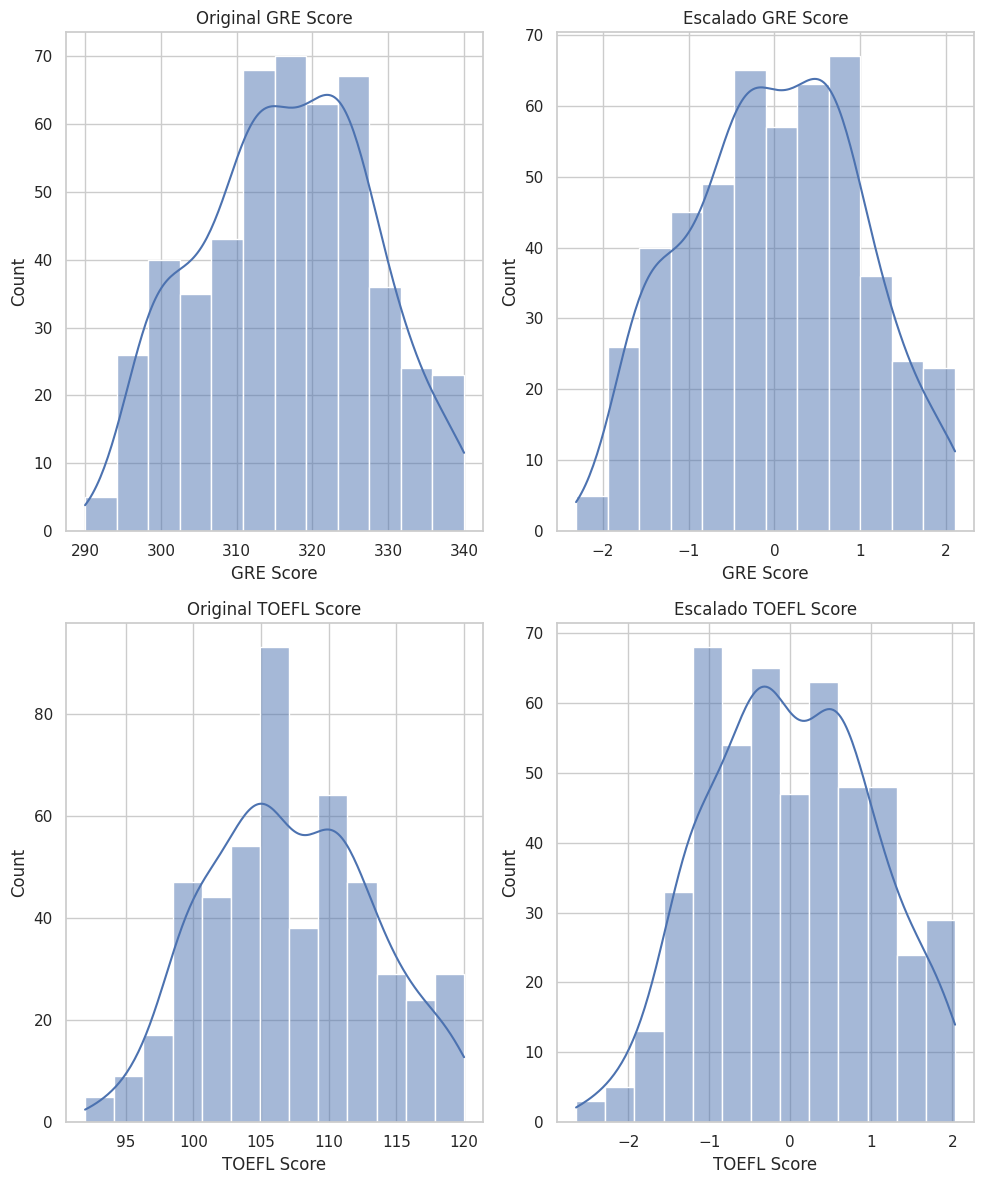

In [70]:
# Graficar distribuciones antes y después del escalado
fig, axes = plt.subplots(len(columns_to_scale), 2, figsize=(10, 12))

# Calculate number of rows and columns for the subplots
num_rows = len(columns_to_scale)
num_cols = 2

for i, col in enumerate(columns_to_scale):
    # Calculate the subplot index based on the current row and column
    subplot_index = i * num_cols + 1

    # Plot the original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original {col}")

    # Plot the scaled distribution
    sns.histplot(df_scaled[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Escalado {col}")

plt.tight_layout()
plt.show()

# ***Estrategias de tratamiento de datos***

##Tratamiento de Outliers

El dataset presenta muchos outliers, por lo que se utiliza la distancia de Mahalanobis para eliminarlos.

In [71]:
X = df.select_dtypes(include=[np.number]).values
mcd = MinCovDet().fit(X)
mahal_dist = mcd.mahalanobis(X)
p = X.shape[1]
threshold = chi2.ppf(0.975, df=p)
df_mahal = pd.DataFrame({'disMahalanobis': mahal_dist})

outliers = df_mahal[ df_mahal['disMahalanobis'] > threshold ]

print("Outliers encontrados:")
print(outliers)

df_wo_outliers = df.drop(outliers.index)
print("\nDataset sin outliers:")
print(df_wo_outliers)


Outliers encontrados:
     disMahalanobis
9         61.738956
10        41.206851
15        18.295683
21        19.595129
27        21.796743
..              ...
465       27.362699
467       17.711147
483       29.267730
492       32.268697
493       21.720614

[77 rows x 1 columns]

Dataset sin outliers:
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   

<Figure size 1600x1200 with 0 Axes>

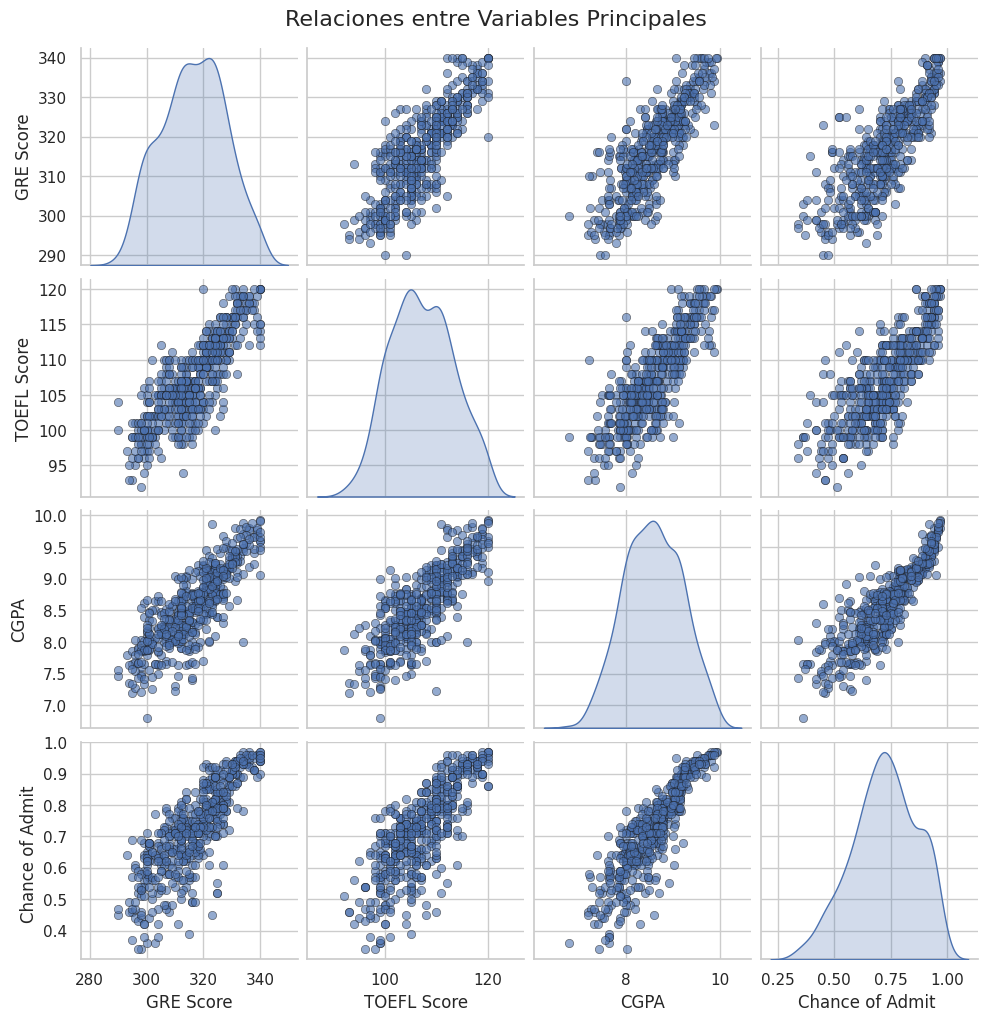

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# Verificar si las columnas existen en el DataFrame
missing_cols = [col for col in features if col not in df_wo_outliers.columns]
if missing_cols:
    print(f"Columnas faltantes en el DataFrame: {missing_cols}")
else:
    plt.figure(figsize=(16, 12))
    sns.pairplot(df[features],
                 kind='scatter',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
                 diag_kws={'fill': True})

    plt.suptitle('Relaciones entre Variables Principales', y=1.02, fontsize=16)
    plt.savefig('pairplot_personalizado.png')
    plt.show()


In [73]:
y = df_wo_outliers[['Chance of Admit ']].rename(columns={'Chance of Admit ': 'target'})
X = df_wo_outliers.drop('Chance of Admit ', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ***Entrenamiento de modelos***

Se utilizará random forest y XGBoost como modelos para obtener la probabilidad.

In [74]:
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
import arviz as az
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

#definiendo variables
features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df[features].values
y = df['Chance of Admit '].values

#Agrupando por rating
groups_all = df['University Rating'].values - 1

# Escalado
scaler = StandardScaler()

# Número de folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lista para almacenar métricas en cada fold
mse_scores = []
mae_scores = []
r2_scores = []

# Definiendo el modelo jerárquico
def hierarchical_model(X, groups, n_groups, y=None):
    n_samples, n_features = X.shape

    mu_intercept = numpyro.sample("mu_intercept", dist.Normal(0, 10))
    sigma_intercept = numpyro.sample("sigma_intercept", dist.HalfNormal(5))
    mu_beta = numpyro.sample("mu_beta", dist.Normal(jnp.zeros(n_features), 10 * jnp.ones(n_features)))
    sigma_beta = numpyro.sample("sigma_beta", dist.HalfNormal(5 * jnp.ones(n_features)))

    intercept = numpyro.sample("intercept", dist.Normal(mu_intercept, sigma_intercept).expand([n_groups]))
    beta = numpyro.sample("beta", dist.Normal(mu_beta, sigma_beta).expand([n_groups, n_features]))

    mu = intercept[groups] + jnp.sum(beta[groups] * X, axis=-1)

    sigma = numpyro.sample("sigma", dist.HalfNormal(5))
    numpyro.sample("obs", dist.StudentT(df=4, loc=mu, scale=sigma), obs=y)

# Validación cruzada
fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")
    # Dividir datos
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    groups_train = groups_all[train_index]
    groups_test = groups_all[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    n_groups = int(np.max(groups_train)) + 1

    rng_key = jax.random.PRNGKey(0)
    nuts_kernel = NUTS(hierarchical_model)
    mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000, num_chains=1)
    mcmc.run(rng_key, X=X_train_scaled, groups=groups_train, n_groups=n_groups, y=y_train)

    predictive = Predictive(hierarchical_model, mcmc.get_samples())
    predictions = predictive(jax.random.PRNGKey(1), X=X_test_scaled, groups=groups_test, n_groups=n_groups)
    mu_pred = predictions["obs"].mean(axis=0)

    mse = mean_squared_error(y_test, mu_pred)
    mae = mean_absolute_error(y_test, mu_pred)
    r2 = r2_score(y_test, mu_pred)
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    fold += 1

# Resultados promedios de validación cruzada
print("\nResultados promedios:")
print("MSE:", np.mean(mse_scores))
print("MAE:", np.mean(mae_scores))
print("R2:", np.mean(r2_scores))


Fold 1


sample: 100%|██████████| 1500/1500 [00:22<00:00, 66.89it/s, 63 steps of size 7.10e-02. acc. prob=0.78]


MSE: 0.0038, MAE: 0.0422, R2: 0.8140
Fold 2


sample: 100%|██████████| 1500/1500 [00:23<00:00, 62.54it/s, 3 steps of size 5.34e-02. acc. prob=0.88]


MSE: 0.0045, MAE: 0.0478, R2: 0.7776
Fold 3


sample: 100%|██████████| 1500/1500 [00:20<00:00, 72.01it/s, 18 steps of size 7.68e-02. acc. prob=0.64]


MSE: 0.0036, MAE: 0.0430, R2: 0.8001
Fold 4


sample: 100%|██████████| 1500/1500 [00:30<00:00, 49.65it/s, 127 steps of size 3.13e-02. acc. prob=0.93]


MSE: 0.0044, MAE: 0.0465, R2: 0.7695
Fold 5


sample: 100%|██████████| 1500/1500 [00:19<00:00, 75.68it/s, 31 steps of size 8.93e-02. acc. prob=0.61] 


MSE: 0.0027, MAE: 0.0360, R2: 0.8723

Resultados promedios:
MSE: 0.0037983431931199255
MAE: 0.0430899137878418
R2: 0.8066920816570768


# ***Conclusión***

Anteriormente habíamos pensado en usar modelos de árboles para resolver el problema, pero dado de que queremos separar las predicciones por rating, optamos mejor por un modelo de regresion lineal jerarquico bayesiano. El cual nos dá métricas excelentes con margenes de error pequeños y funciona mejor que los anteriores en la práctica.

In [75]:
import joblib

joblib.dump(mcmc.get_samples(), 'model.pkl')

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# ***Implementación del ChatBot***

El objetivo era crear un sistema que pueda responder preguntas basadas en ejemplos previos. Para lograrlo, se siguieron estos pasos:

In [76]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar el dataset de preguntas y respuestas
with open("dataset_preguntas_respuestas.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convertirlo en DataFrame
df = pd.DataFrame(data)

# Vectorizar las preguntas
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["input"])
y = df["output"]

print("Datos listos para entrenar")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_preguntas_respuestas.json'

Aquí se entrena un Random Forest, que es un conjunto de múltiples árboles de decisión. Se elige este modelo porque:

* Es robusto y maneja bien datos de texto vectorizados.

* Puede capturar patrones en los datos sin sobreajustarse fácilmente.

* Es fácil de interpretar y rápido en predicción.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

import joblib
joblib.dump(rf_model, "modelo_preguntas.pkl")
joblib.dump(vectorizer, "vectorizador.pkl")

print("Modelo entrenado y guardado")

Aquí se cargan el modelo y el vectorizador y se define una función que toma una pregunta del usuario, la convierte en un vector numérico y usa el modelo entrenado para predecir la respuesta más adecuada

In [ ]:
# Cargar modelo y vectorizador
rf_model = joblib.load("modelo_preguntas.pkl")
vectorizer = joblib.load("vectorizador.pkl")

# Función para responder preguntas
def responder(pregunta):
    pregunta_vectorizada = vectorizer.transform([pregunta])
    respuesta = rf_model.predict(pregunta_vectorizada)
    return respuesta[0]

# Prueba
pregunta_usuario = "¿Qué necesito para estudiar en EE.UU.?"
respuesta = responder(pregunta_usuario)
print("Respuesta:", respuesta)

In [ ]:
from google.colab import files
files.download('modelo_preguntas.pkl')
files.download('vectorizador.pkl')